# Decision Tree algorithm
- Used for both classification and regression
- Non-parametric model, which means the number of parameter is not fixed prior to the training, which also means
it has the risk of becoming overfitting as it tries to follow closely with the training data
- Easy to interpret the decision of the model
- One famous example of Decision Tree illustration:
<center><img src='../assets/decision_tree_obama.jpg' width="600" height="800"></center>

#### Decision Tree Classification
- To explain the working mechanism of DecisionTreeClassifier, let's have a look at the classification of the infamous iris dataset
which come with scikitlearn

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from utils import plot_decision_boundary, plot_2d_boundary

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures


IMAGES_PATH = "."
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

One of the coolest feature of Decision Tree is that we can visualise its decision making. Here we use the library graphviz

In [3]:
#!conda install -y python-graphviz

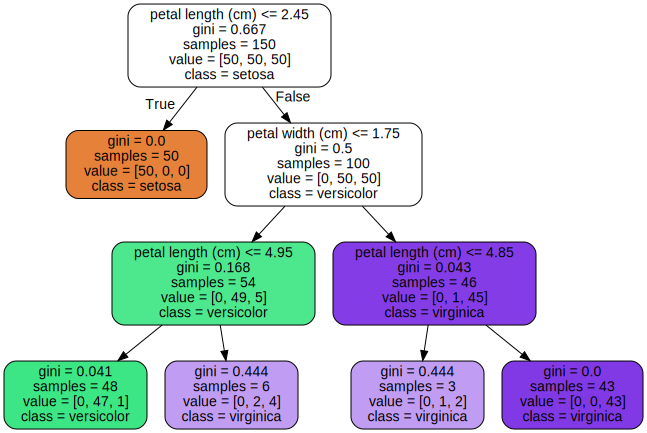

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [5]:
!dot -Tpng images/decision_trees/iris_tree.dot -o iris_tree.png

Error: dot: can't open images/decision_trees/iris_tree.dot


Let's go through one prediction done by DecisionTreeClassifier on iris dataset
- First given a flower with petal length in cm. It will check whether this feature is less than 2.45cm.
- If this is True, then it moves down the left node and here among 50 samples which has the petal length <= 2.45 cm, all of them are setosa.
- If the petal length is greater than 2.45cm, then it moves down the right node. 
- On this 2nd level, it compares the petal width with 1.75cm. If it is less than 1.75cm, then it moves down the left childnode. Here, among 54 samples with petal width <= 1.75cm, 49 of them are versicolor, hence the prediction would be versicolor.
- Otherwise if petal width is greater than 1.75 then out of 46 samples, 45 of them are virginica.

Here are some of the important attributes within each node:
- gini: measures the impurity of the training instances that it applies to. If gini is 0, that means all of the instances belong to one class (for example: setosa)
- samples: the number of instances satisfies the feature condition.
- values: the separation into classes that having the feature condition.
- class: the current classification for the instance. We only take the class of the leaf node as the final classification.

Scikit-learn uses CART (Classification And Regression Tree) algorithm to generate binary tree. Hence all nodes are having zero or 2 leaf nodes. 
You can control how deep you want to grow the trees (and Yes, in Computer Science you grow the tree downwards) by changing the `max_depth` parameter of DecisionTreeClassifier.


In [6]:
from matplotlib.colors import ListedColormap
from utils import plot_decision_boundary
# def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
#     x1s = np.linspace(axes[0], axes[1], 100)
#     x2s = np.linspace(axes[2], axes[3], 100)
#     x1, x2 = np.meshgrid(x1s, x2s)
#     X_new = np.c_[x1.ravel(), x2.ravel()]
#     y_pred = clf.predict(X_new).reshape(x1.shape)
#     custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
#     plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
#     if not iris:
#         custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
#         plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
#     if plot_training:
#         plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
#         plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
#         plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
#         plt.axis(axes)
#     if iris:
#         plt.xlabel("Petal length", fontsize=14)
#         plt.ylabel("Petal width", fontsize=14)
#     else:
#         plt.xlabel(r"$x_1$", fontsize=18)
#         plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
#     if legend:
#         plt.legend(loc="lower right", fontsize=14)

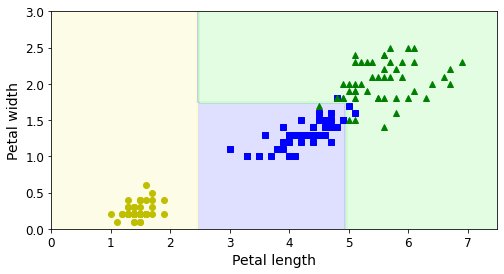

In [7]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.show()

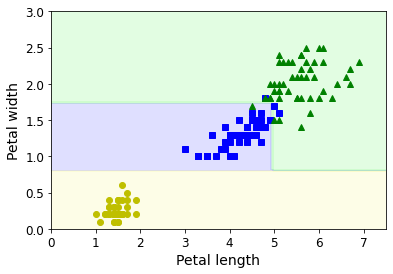

In [8]:
# Without any constraint
tree_clf_1 = DecisionTreeClassifier(min_samples_leaf=4, random_state=0)
tree_clf_1.fit(X, y)

plot_decision_boundary(tree_clf_1, X, y)

#### Exercise ####
- Change random_state to see different boundary
- Modify min_samples_leaf, min_samples_split
- Change the depth of the tree and then visualise the decision tree as well as the decision boundary
- Test the prediction in a flower with petals_length is 5 cm and petals_width is 1.5cm. What happened if we change the max_depth from 2 to 3?

As you can see, DecisionTree is not very stable, changining random_state might lead to completely different decision boundary. We will see how RandomForests can be used to limit this instability.

In [9]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [10]:
tree_clf.predict([[5, 1.5]]) # Versicolor

array([2])

## Apply the Decision Tree Classifider on Titanic Dataset

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
final_train = pd.read_csv('../data/final_titanic_train.csv')

# create X (features) and y (response)
X_titanic = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y_titanic = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=2)

In [12]:
# Try a simple decision tree classifier
decision_tree_clf = DecisionTreeClassifier()

decision_tree_clf = decision_tree_clf.fit(X_train, y_train)

In [13]:
# 98% accuracy on the training data
decision_tree_clf.score(X_train,y_train)

0.9859550561797753

In [14]:
# Perform cross validation score to validate the accuracy of the training
cross_val_score(DecisionTreeClassifier(), X_titanic, y_titanic, cv=10).mean()

0.7845443196004993

Eventhough it achieves 98% accuracy on the training data, its cross validation score is only ~79%, which means it overfitted the data.
One way to regularise decision tree model is to limit the depth of the tree, we can try to do it manually as:

In [15]:
print('Max_depth=2', cross_val_score(DecisionTreeClassifier(max_depth=2), X_titanic, y_titanic, cv=10).mean())

print('Max_depth=3', cross_val_score(DecisionTreeClassifier(max_depth=3), X_titanic, y_titanic, cv=10).mean())

print('Max_depth=4', cross_val_score(DecisionTreeClassifier(max_depth=4), X_titanic, y_titanic, cv=10).mean())

print('Max_depth=5', cross_val_score(DecisionTreeClassifier(max_depth=5), X_titanic, y_titanic, cv=10).mean())

Max_depth=2 0.7688764044943821
Max_depth=3 0.8170661672908863
Max_depth=4 0.7980774032459426
Max_depth=5 0.8047690387016229


From the tree pruning method, with a depth of 3 we are able to achieve 81.4% accuracy, which is encouraging given that we do not do much on manipulating the dataset. 

## Pros/ Cons of Decision Tree
Advantages of Decision Tree:

- Easy to explain and visualise the decision making
- Highly interpretable.
- Model training and prediction are fast.
- Most of the time, it does not require feature scaling or centering

Disadvantages of Decision Tree:
- Instability with changes in data
- CART is a greedy algorithm, therefore it is not guaranteed to perform optimally across different training sets or even among subsets of a training data.
- It does not work well with unbalanced dataset, easily biased.

#### Exercise:
Use graphviz to visualise the decision tree for the titanic dataset

In [16]:
list(map(str, pd.unique(y)))

['0', '1', '2']

In [17]:
export_graphviz(
        decision_tree_clf,
        out_file=os.path.join(IMAGES_PATH, "titanic_tree.dot"),
        feature_names=X_titanic.columns,
        class_names=list(map(str, pd.unique(y_titanic))),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "titanic_tree.dot"));

!dot -Tpng ./titanic_tree.dot -o titanic_tree.png

#### (Optional) DecisionTreeRegressor for regression tasks